In [1]:
import pandas as pd
import io

In [2]:
with open('/content/merged_file.csv', encoding='utf-8', errors='replace') as f:
    data = f.read()

df = pd.read_csv(io.StringIO(data))

In [3]:
df

,Unnamed: 0_x,ids,text,Unnamed: 0_y,Label,tweet
0,0,1.301327e+18,@TRTArabi ال سلول الجبان الذليل المنافق كلب من...,52252,T,empty
1,0,1.301327e+18,@TRTArabi ال سلول الجبان الذليل المنافق كلب من...,52252,T,empty
2,1,1.307995e+18,@TRTArabi الا يا ال زايد خبرونا \nأما فيكم من ...,52254,T,empty
3,1,1.307995e+18,@TRTArabi الا يا ال زايد خبرونا \nأما فيكم من ...,52254,T,empty
4,6,1.321068e+18,NaN,52259,T,empty
...,...,...,...,...,...,...
27291,9337,1.285298e+18,@TRLuxuryFurni84 يارررررب...نفرح بزوال حكم أل ...,52244,T,empty
27292,9339,1.282019e+18,@Trseso90 الحق على ال سلول هم خطفوهم,52247,T,empty
27293,9340,1.302504e+18,@Trt10616790 @SalaheddinMora1 @Mohdelmoctar @m...,52248,T,empty
27294,9341,1.294151e+18,@trt123430 @T1beCVnnEzLlKzO @DrAlnefisi لما شر...,52249,T,empty


In [4]:
df.isna().sum()

Unnamed: 0_x       0
ids                0
text            4082
Unnamed: 0_y       0
Label              0
tweet              0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isna().sum()

Unnamed: 0_x    0
ids             0
text            0
Unnamed: 0_y    0
Label           0
tweet           0
dtype: int64

In [12]:
df.columns

Index(['Unnamed: 0_x', 'ids', 'text', 'Unnamed: 0_y', 'Label', 'tweet'], dtype='object')

In [13]:
df.tweet

0        empty
1        empty
2        empty
3        empty
8        empty
         ...  
27291    empty
27292    empty
27293    empty
27294    empty
27295    empty
Name: tweet, Length: 23214, dtype: object

In [14]:
from matplotlib import pyplot as plt

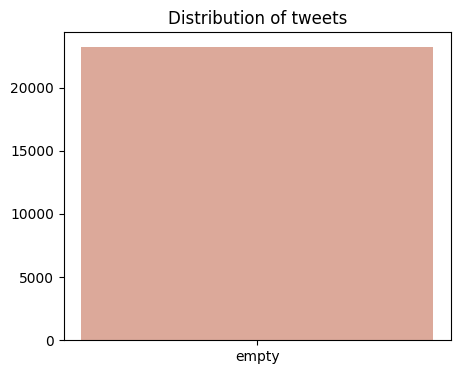

In [15]:
fig = plt.figure(figsize =(5, 4))
plt.bar(df['tweet'].value_counts().index, df['tweet'].value_counts(),color ='#DCA99A');
plt.title("Distribution of tweets");

In [17]:
df=df.drop('Unnamed: 0_x', axis=1)

In [18]:
df=df.drop('Unnamed: 0_y', axis=1)

In [19]:
df.columns

Index(['ids', 'text', 'Label'], dtype='object')

In [20]:
df

,ids,text,Label
0,1.301327e+18,@TRTArabi ال سلول الجبان الذليل المنافق كلب من...,T
1,1.301327e+18,@TRTArabi ال سلول الجبان الذليل المنافق كلب من...,T
2,1.307995e+18,@TRTArabi الا يا ال زايد خبرونا \nأما فيكم من ...,T
3,1.307995e+18,@TRTArabi الا يا ال زايد خبرونا \nأما فيكم من ...,T
8,1.286802e+18,@TRTArabi والله ترتيلك للقران يزلزل ال سلول وا...,T
...,...,...,...
27291,1.285298e+18,@TRLuxuryFurni84 يارررررب...نفرح بزوال حكم أل ...,T
27292,1.282019e+18,@Trseso90 الحق على ال سلول هم خطفوهم,T
27293,1.302504e+18,@Trt10616790 @SalaheddinMora1 @Mohdelmoctar @m...,T
27294,1.294151e+18,@trt123430 @T1beCVnnEzLlKzO @DrAlnefisi لما شر...,T


In [21]:
import re

In [22]:
class preprocessingg:

  def clean_arabic_text(text):

    text = re.sub(r'[^\u0600-\u06FF\s😀-🙏]+', '', text)
    
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'https?://[^\s]+', '', text)
    
    text = re.sub(r'[!.,;?]+', ' ', text)
    
    text = re.sub(r'\b(ل(ا|م) )\b', 'لا_', text)
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
  
    
    return text


In [23]:
df['text']=df['text'].apply(preprocessingg.clean_arabic_text)

In [24]:
df

,ids,text,Label
0,1.301327e+18,ال سلول الجبان الذليل المنافق كلب من كلاب الص...,T
1,1.301327e+18,ال سلول الجبان الذليل المنافق كلب من كلاب الص...,T
2,1.307995e+18,الا يا ال زايد خبرونا \nاما فيكم من الاشراف س...,T
3,1.307995e+18,الا يا ال زايد خبرونا \nاما فيكم من الاشراف س...,T
8,1.286802e+18,والله ترتيلك للقران يزلزل ال سلول وال شيطان ح...,T
...,...,...,...
27291,1.285298e+18,ياررررربنفرح بزوال حكم ال سلول وبطانتهثمبنات ...,T
27292,1.282019e+18,الحق علي ال سلول هم خطفوهم,T
27293,1.302504e+18,دعايه لنتنياهو وتحريف للبوصله وشيطنه غزه و...,T
27294,1.294151e+18,لما شراذمه القوم يحكموا بلد امثال ال سلول ا...,T


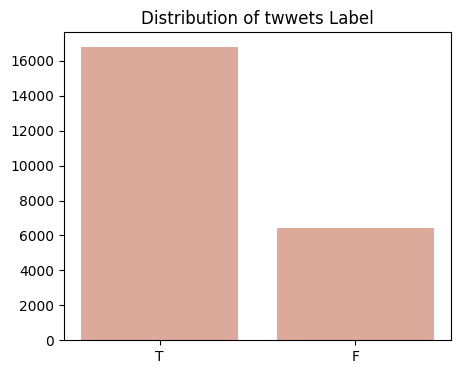

In [25]:
fig = plt.figure(figsize =(5, 4))
plt.bar(df['Label'].value_counts().index, df['Label'].value_counts(),color ='#DCA99A');
plt.title("Distribution of twwets Label");

In [26]:
df['Label'] = df['Label'].map({'T': 1, 'F': 0})

In [27]:
df

,ids,text,Label
0,1.301327e+18,ال سلول الجبان الذليل المنافق كلب من كلاب الص...,1
1,1.301327e+18,ال سلول الجبان الذليل المنافق كلب من كلاب الص...,1
2,1.307995e+18,الا يا ال زايد خبرونا \nاما فيكم من الاشراف س...,1
3,1.307995e+18,الا يا ال زايد خبرونا \nاما فيكم من الاشراف س...,1
8,1.286802e+18,والله ترتيلك للقران يزلزل ال سلول وال شيطان ح...,1
...,...,...,...
27291,1.285298e+18,ياررررربنفرح بزوال حكم ال سلول وبطانتهثمبنات ...,1
27292,1.282019e+18,الحق علي ال سلول هم خطفوهم,1
27293,1.302504e+18,دعايه لنتنياهو وتحريف للبوصله وشيطنه غزه و...,1
27294,1.294151e+18,لما شراذمه القوم يحكموا بلد امثال ال سلول ا...,1
